# Lab Week 3 - Logistic Regression

## EXERCISE: Predicting Survival on the Titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In [2]:
# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
titanic = pd.read_csv('../../data/titanic.csv', index_col='PassengerId')
print(titanic)

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   
11                  1       3   
12                  1       1   
13                  0       3   
14                  0       3   
15                  0       3   
16                  1       2   
17                  0       3   
18                  1       2   
19                  0       3   
20                  1       3   
21                  0       2   
22                  1       2   
23                  1       3   
24                  1       1   
25                  0       3   
26                  1       3   
27                  0       3   
28                  0       1   
29        

In [3]:
# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

In [4]:
# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# TASK 4: fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
print(logreg.fit(X_train, y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [6]:
# TASK 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.668161434978


In [7]:
# TASK 6: add Age as a feature and calculate testing accuracy
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))


0.686098654709


In [8]:
# TASK 7 : Confusion Matrix
from sklearn import metrics
prds = logreg.predict(X)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[112  16]
 [ 54  41]]


In [9]:
# TASK 8: Generate the ROC Curve

# Import the Plotting library so we can draw the graph
import matplotlib.pyplot as plt

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]



In [10]:
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)



In [12]:
# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr,tpr)
print (roc_auc)


0.685074013158


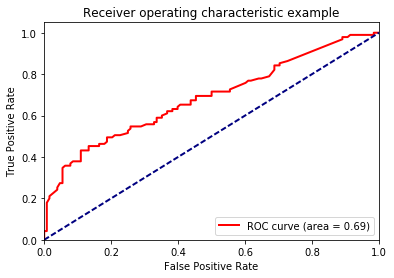

In [24]:
# Plot the ROC Curve
plt.figure()
lw = 2 #lkine width
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right") #location of legend
plt.show()

# What's happening here is we are changing the cutoff value from 0 to 1.
# When we have a cutoff of zero this means that we have no positive predictions so both fpr and tpr are both 0
# Our aim when modelling is to maximise the area under the curve, the closer to one the better the model.

In [25]:
# TASK 9: What variables should we include in the model to improve it?

# Firstly, let's convert our character vectors to binary represnetations so we can use them in the model
titanic_with_dummies = pd.get_dummies(data=titanic, columns = ['Sex', 'Embarked', 'Pclass'], prefix = ['Sex', 'Embarked', 'Pclass'] )



In [26]:
# Inspect the new data set with one-hot encoding done through pandas
print(titanic_with_dummies.head())



             Survived                                               Name  \
PassengerId                                                                
1                   0                            Braund, Mr. Owen Harris   
2                   1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3                   1                             Heikkinen, Miss. Laina   
4                   1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5                   0                           Allen, Mr. William Henry   

              Age  SibSp  Parch            Ticket     Fare Cabin  Sex_female  \
PassengerId                                                                    
1            22.0      1      0         A/5 21171   7.2500   NaN           0   
2            38.0      1      0          PC 17599  71.2833   C85           1   
3            26.0      0      0  STON/O2. 3101282   7.9250   NaN           1   
4            35.0      1      0            113803  53.1000  C123   

In [27]:
# For now we will just fill the age column by taking the average by sex, class and Parch
# Later on we will use methods that can handle missing values better.
titanic_with_dummies['Age'] = titanic_with_dummies[['Age',"Parch","Sex_male",'Pclass_1', 'Pclass_2']].groupby(["Parch","Sex_male",'Pclass_1', 'Pclass_2'])['Age'].transform(lambda x: x.fillna(x.mean()))




In [28]:
# Now let's include them one by one and see if they improve the model
# NOTE!!! We don't do this in practice and will learn better techniques next week. But the idea is useful to think about
feature_cols = ['Parch', 'Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Fare', 'Age']
X = titanic_with_dummies[feature_cols]
y = titanic_with_dummies.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)

# Print the new accuracy rate
print(metrics.accuracy_score(y_test, y_pred_class))

0.798206278027


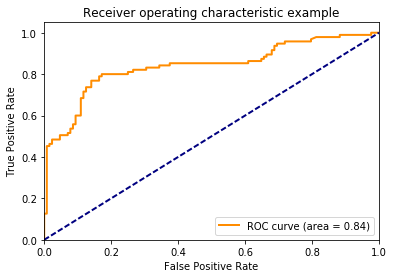

In [29]:
# Generate the ROC curve for our ne model

# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr,tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Notice how the area under the curve changes when we imporve the model.

# Actually, we can fit an even better model than this, try and beat this model 
# Prize for the first person to get accuracy above 0.85 on the test set!

In [30]:
# Task 10: Try a different classification algorithm like Naive Bayes or Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(5)
KNN_model.fit(X_train, y_train)
y_pred_class = KNN_model.predict(X_test)
# Print the new accuracy rate
print(metrics.accuracy_score(y_test, y_pred_class))

0.72197309417


In [31]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred_class = NB_model.predict(X_test)
# Print the new accuracy rate
print(metrics.accuracy_score(y_test, y_pred_class))

0.780269058296
